In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset 
d = load_digits()

In [3]:
# forming Features Dataframe
feature = pd.DataFrame(d.data, columns=d.feature_names)

In [4]:
# forming Target Dataframe
target = pd.DataFrame(d.target)

In [5]:
# forming Features+Target Dataframe
df = feature
df['target'] = target

In [6]:
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [111]:
# Selecting the 20 most relevant features out of 65 to reduce noise/garbage using SelectkKBest method
bivariate_selection = SelectKBest(f_classif, k=20).fit(feature, target)

C:\Users\shoun\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\shoun\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 0 32 39 64] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\shoun\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\shoun\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [112]:
mask = bivariate_selection.get_support()
col = feature.columns[mask]

In [113]:
# forming the updated 20 most relevant features dataframe
feat = feature[col]

In [114]:
# forming train test data
xtrain, xtest, ytrain, ytest = train_test_split(feat,target, test_size = 0.2)

In [115]:
# forming model for logistical regression
model = LogisticRegression(penalty = 'l2', solver= 'liblinear').fit(xtrain,ytrain)

C:\Users\shoun\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [116]:
# getting predicted values
ypred = model.predict(xtest)

In [117]:
# getting classification report for precision, recall, f1score
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.94      0.97        33
           2       0.91      0.97      0.94        33
           3       0.97      0.97      0.97        33
           4       1.00      1.00      1.00        44
           5       0.97      0.94      0.95        33
           6       0.95      0.95      0.95        42
           7       0.95      0.95      0.95        38
           8       0.91      0.97      0.94        40
           9       0.96      0.89      0.93        28

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [118]:
#forming a data frame of ytest and ypred values for graphical representation

pdf.head()

,ytest,ypred
0,8,8
1,3,3
2,6,6
3,6,6
4,2,2


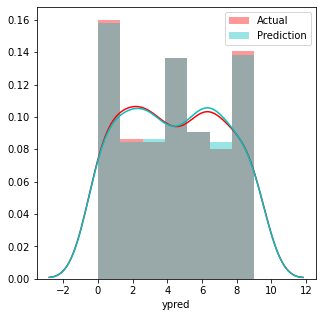

In [119]:
# graphical representation
plt.figure(figsize=(5,5))
sns.distplot(pdf['ytest'],color = 'r',  label = 'Actual')
sns.distplot(pdf['ypred'],color = 'c', label='Prediction')
plt.legend()
plt.show()

<Figure size 720x720 with 0 Axes>

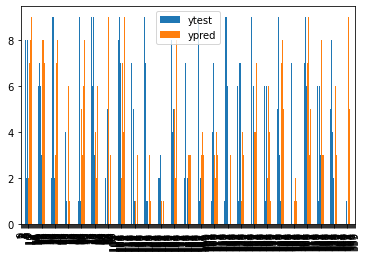

In [120]:
# graphical representation
plt.figure(figsize=(10,10))
pdf.plot.bar()
plt.show()